# 🎓 Understanding Naive Bayes for Phishing Email Classification 📧🔐

### What is Naive Bayes? 🤔
Naive Bayes is a **probabilistic machine learning algorithm** based on **Bayes' Theorem**. It's called "naive" because it assumes that the features (in this case, email characteristics such as word frequency, sender, etc.) are **independent** of each other. Despite this simplification, Naive Bayes performs surprisingly well in many real-world tasks, especially in text classification like phishing email classification. 🚀

---

### Bayes' Theorem Formula 📐

The foundation of Naive Bayes is **Bayes' Theorem**:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:
- **P(A|B)** is the probability of event **A** happening given that **B** is true (posterior probability).
- **P(B|A)** is the likelihood of event **B** occurring given **A** is true.
- **P(A)** is the prior probability of **A** happening.
- **P(B)** is the probability of **B** occurring.

In our case:
- **A**: Email is phishing or safe.
- **B**: Certain words or features present in the email (like "bank", "urgent", etc.).

Using a concrete example:  
Given P(A) = email is phishing, P(B) = the email contains word "credit card",
**P(A|B)** is the probability that an email is phishing, given that it contains the phrase "credit card."


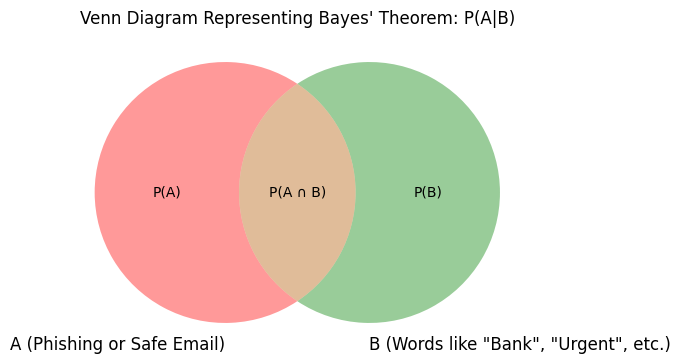

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create a Venn diagram for P(A|B)
plt.figure(figsize=(6,6))

venn = venn2(subsets=(1, 1, 0.5), set_labels=('A (Phishing or Safe Email)', 'B (Words like "Bank", "Urgent", etc.)'))

venn.get_label_by_id('10').set_text('P(A)')
venn.get_label_by_id('01').set_text('P(B)')
venn.get_label_by_id('11').set_text('P(A ∩ B)')

plt.title("Venn Diagram Representing Bayes' Theorem: P(A|B)")
plt.show()

## Library for Naive Bayes 📚

### Why Use Scikit-learn for Naive Bayes? 🚀

Scikit-learn is widely used in both industry and academia due to its simplicity, efficiency, and versatility.   
We can easily build, train and evaluate models. 🎯

---

### How Scikit-learn Implements Naive Bayes ⚙️   

Scikit-learn’s `MultinomialNB` is designed for **text classification tasks** like spam detection. It calculates **probabilities** based on word counts, using Bayes’ Theorem.

---

### Implementation 🔍

1. **Loading Required Libraries** 📚

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

2. **Loading and splitting the Data** 📥

In [3]:
# Load the save TF-IDF features and labels
x_data = np.load('../feature_x.npy')
y_data = np.load('../y_tf.npy')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=0)

3. **Model Initialization** 🤖
   - Multinomial Naive Bayes model is particularly well-suited for problems where the features represent counts or frequencies of events, such as word counts in an email. It is configured with default parameters like `alpha=1.0` (for smoothing). This makes sure words with zero occurrences don’t skew the results.

In [4]:
nb = MultinomialNB()

4. **Training the Model** 🏋️:
   - The `fit()` method is used to train the model with the training data. It calculates the **prior probabilities** for each class and **likelihoods** of the words appearing in those classes:

In [5]:
nb.fit(x_train,y_train)

MultinomialNB()


3. **Making Predictions** 🔮:
   - After training, the model can predict the class (spam or not spam) for unseen data using the `predict()` method.


In [6]:
y_pred = nb.predict(x_test)

4. **Evaluating the Model** 🧮:
   - Scikit-learn provides built-in tools to evaluate model performance, such as **accuracy** and the **classification report**.

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9751995438996579
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1351
           1       0.98      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.98      0.98      0.98      3508

